In [1]:
from helpers.embed import random_graph

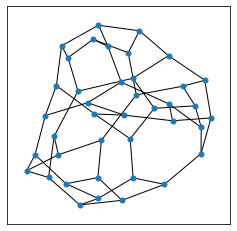

In [2]:
size =40
G = random_graph(nodes=size, edges=3)

In [3]:
G.edges

EdgeView([(13, 27), (13, 28), (13, 18), (27, 1), (27, 9), (25, 32), (25, 34), (25, 4), (32, 24), (32, 30), (26, 33), (26, 31), (26, 37), (33, 6), (33, 19), (15, 36), (15, 20), (15, 16), (36, 10), (36, 21), (6, 5), (6, 2), (23, 31), (23, 12), (23, 29), (31, 8), (20, 38), (20, 17), (38, 9), (38, 37), (22, 29), (22, 34), (22, 30), (29, 3), (3, 37), (3, 8), (2, 11), (2, 14), (11, 18), (11, 21), (14, 4), (14, 12), (19, 9), (19, 1), (0, 35), (0, 28), (0, 12), (35, 17), (35, 30), (17, 39), (39, 10), (39, 34), (10, 28), (7, 16), (7, 21), (7, 24), (16, 18), (1, 8), (24, 5), (4, 5)])

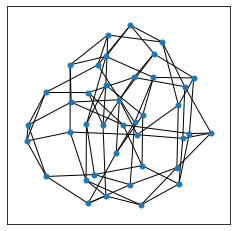

In [4]:
size =40
G = random_graph(nodes=size, edges=4)

In [5]:
G.edges

EdgeView([(25, 32), (25, 38), (25, 16), (25, 30), (32, 33), (32, 35), (32, 23), (7, 26), (7, 5), (7, 2), (7, 8), (26, 20), (26, 35), (26, 17), (15, 39), (15, 36), (15, 31), (15, 37), (39, 30), (39, 17), (39, 6), (20, 38), (20, 24), (20, 17), (38, 21), (38, 14), (5, 19), (5, 9), (5, 18), (19, 3), (19, 16), (19, 28), (23, 34), (23, 0), (23, 22), (34, 4), (34, 30), (34, 36), (0, 14), (0, 29), (0, 8), (14, 21), (14, 18), (2, 11), (2, 8), (2, 28), (11, 37), (11, 27), (11, 10), (30, 33), (1, 33), (1, 17), (1, 13), (1, 27), (33, 31), (12, 36), (12, 9), (12, 35), (12, 10), (36, 16), (13, 28), (13, 37), (13, 27), (28, 31), (18, 21), (18, 3), (21, 22), (37, 24), (24, 10), (24, 22), (31, 29), (9, 16), (9, 6), (4, 8), (4, 35), (4, 3), (27, 29), (29, 6), (3, 10), (22, 6)])

In [8]:
import dwave_networkx as dnx
pegasus_16 = dnx.pegasus_graph(16)
import networkx as nx
import dimod 

import minorminer

def max_chain_length(embedding):
    return max(map(len, embedding.values()))

try:
    embedding = minorminer.find_embedding(G, pegasus_16)
    print("embedded n={} with longest chain of {}.".format(size, max_chain_length(embedding)))
except ValueError:
    print("embedding n={} clique failed.".format(size))

embedded n=40 with longest chain of 2.


In [9]:
row= [0]*size
for i in range(size):
    row[i]=len(embedding[i])
cnts = dict.fromkeys([1,2,3], 0)  # initialize with 0

# count them
for item in row:
    cnts[item] += 1

cnts

{1: 22, 2: 18, 3: 0}

In [11]:
import os

from dwave.system.samplers import DWaveSampler
from dwave.cloud.exceptions import *

try:
    qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})
    qpu_2000q = DWaveSampler(solver={'topology__type': 'chimera'})
    
    qpus = {'Advantage': qpu_advantage, 'DW-2000Q': qpu_2000q}

    print("Connected to Advantage {} and 2000Q {}.".format(qpu_advantage.solver.id, qpu_2000q.solver.id))
except SolverNotFoundError:
    print("Currently a pair of solvers are unavailable for sections comparing QPU technologies. Try those examples later.")

Connected to Advantage Advantage_system6.1 and 2000Q DW_2000Q_6.


In [49]:
from collections import defaultdict

Q = defaultdict(int)

# Fill in Q matrix
for u, v in G.edges:
    Q[(u,u)] += -1
    Q[(v,v)] += -1
    Q[(u,v)] += 2

for u in G.nodes:
    Q[(u,u)] += 1

In [15]:
import dwave.inspector

In [31]:
a=0
for u in G.nodes:
    a=a+u
a

780

In [50]:
from dwave.system import EmbeddingComposite
sampler = EmbeddingComposite(qpu_advantage)

In [51]:
num_reads = 1000
sampleset = sampler.sample_qubo(Q, num_reads=num_reads, \
                                label='SDK Examples - Inspector')

In [52]:
dwave.inspector.show(sampleset) 

'http://127.0.0.1:18000/?problemId=b5c67998-5506-45a4-a9a5-cd5ac7cb7ebf'